In [1]:
import sys, os
sys.path.append(os.path.abspath('/Users/mirian81/pyhton/Elegant_python_scripts'))
import twis_plot as TWPlot
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
%matplotlib inline
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *
from DALI_lattice import *

initializing ocelot...
ocelot: 24.03.0
0.7853981633974483 0.23561944901923448 0.19634954084936207
0.2617993877991494


In [2]:
#TWPlot.threeDphase_space('dali.inj')

In [3]:
phi=-3
LA1RC1.phi=phi; LA1RC2.phi=phi; LA2RC1.phi=phi; LA2RC1.phi=phi

In [4]:
p_array_init = load_particle_array("p_array.npz")


z = 22.97899999999998 / 22.97899999999998. Applied:  SpaceChargee
 time exec: 189.55532503128052 sec


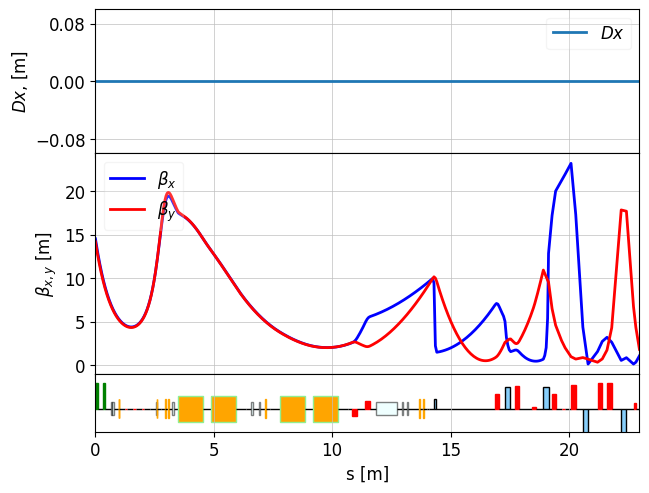

In [5]:
method = {"global": SecondTM}
lat_DALI_MIR = MagneticLattice(latcell_to_MIR,method=method) 
# Initializing SpaceCharge
sc1 = SpaceCharge()
sc1.nmesh_xyz = [63, 63, 63]
sc1.step = 1

sc3 = SpaceCharge()
sc3.nmesh_xyz = [63, 63, 63]
sc3.step = 3
navi = Navigator(lat_DALI_MIR)
navi.unit_step = 0.02
# add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc1, START1I, enter_Linac1)
navi.add_physics_proc(sc3, enter_Linac1, lat_DALI_MIR.sequence[-1])

# definiing of unit step in [m]


p_array = deepcopy(p_array_init)
start = time.time()
tws_track, p_array = track(lat_DALI_MIR, p_array, navi, bounds=[-0.01, 0.01])
print("\n time exec:", time.time() - start, "sec")

# optic presntation 
plot_opt_func(lat_DALI_MIR, tws_track,fig_name=0, legend=False)
plt.show()

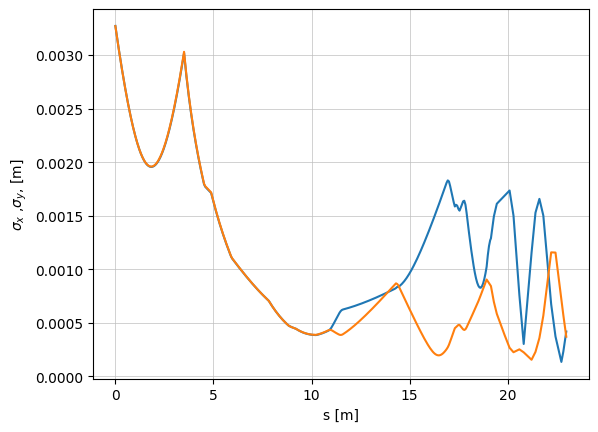

In [6]:
sigma_x = np.sqrt([tw.xx for tw in tws_track])
sigma_y = np.sqrt([tw.yy for tw in tws_track])
s = [tw.s for tw in tws_track]

plt.plot(s, sigma_x)
plt.plot(s, sigma_y)
plt.xlabel("s [m]")
plt.ylabel(r"$\sigma_x$ ,$\sigma_y$, [m]")
plt.show()


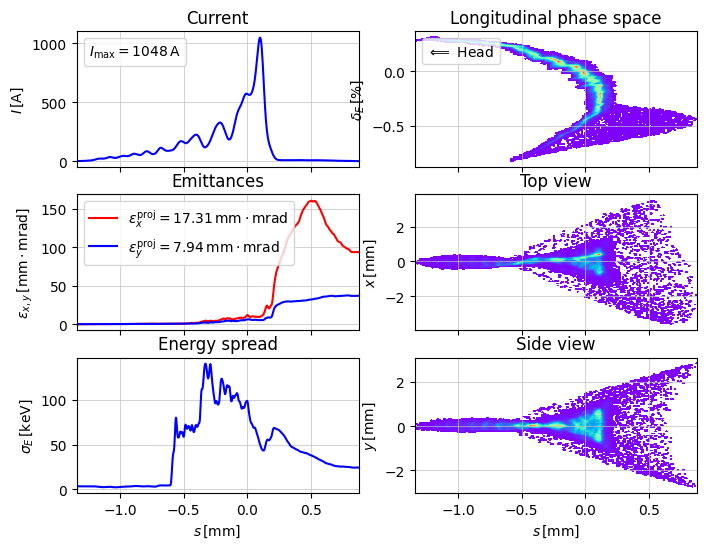

In [6]:
show_e_beam(p_array, figsize=(8,6))
plt.show()

In [8]:
print(p_array)

ParticleArray: 
Ref. energy : 0.0535 GeV 
Ave. energy : 0.0535 GeV 
std(x)      : 0.418 mm
std(px)     : 1.351 mrad
std(y)      : 0.37 mm
std(py)     : 1.348 mrad
std(p)      : 0.0023
std(tau)    : 0.316 mm
Charge      : 1.0 nC 
s pos       : 22.97899999999997 m 
n particles : 999999

